In [2]:
import s3fs
import os, sys
sys.path.append('../src')
import hazard.utilities.zarr_utilities as zarr_utilities
os.environ["CREDENTIAL_DOTENV_DIR"] = os.path.dirname(os.getcwd())
zarr_utilities.set_credential_env_variables()
s3 = s3fs.S3FileSystem(anon=False, key=os.environ["OSC_S3_ACCESS_KEY"], secret=os.environ["OSC_S3_SECRET_KEY"])

KeyError: 'OSC_S3_ACCESS_KEY'

In [24]:
from affine import Affine
longitude = 2.293
latitude = 48.855
transform = Affine(0.008333333333333333, 0.0, -180.0, 0.0, -0.008333333333333333, 90.0, 0.0, 0.0, 1.0)

In [ ]:
transform * (0, 0)

In [3]:
from hazard.sources.osc_zarr import OscZarr
import s3fs
path = "inundation/wri/v2/inunriver_rcp4p5_MIROC-ESM-CHEM_2030"
root = f"physrisk-hazard-indicators/hazard/hazard.zarr"
zarr_store = s3fs.S3Map(root=root, s3=s3, check=False)
source = OscZarr(prefix="hazard",store=zarr_store)
da = source.read(path)

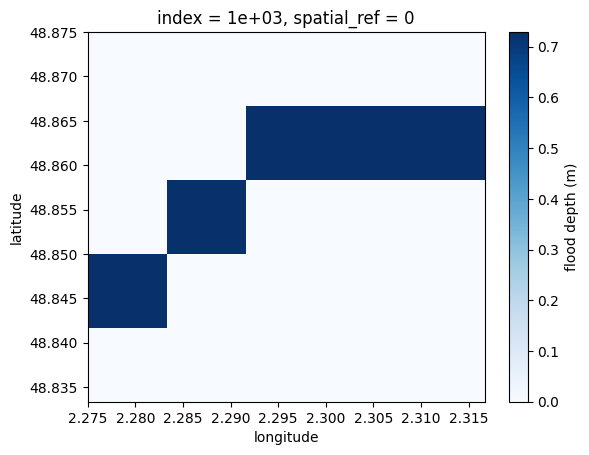

In [45]:
delta = 0.02
plt1 = da.sel(latitude=slice(latitude + delta, latitude - delta), longitude=slice(longitude - delta, longitude + delta))[8, :, :].plot.pcolormesh(cmap="Blues", cbar_kwargs={"label":"flood depth (m)"})

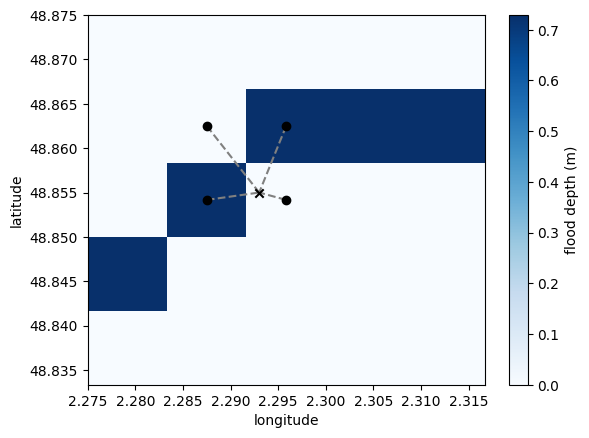

In [46]:

# the point falls in pixel 21875, 4937
import matplotlib.pyplot as plt
plt1.axes.set_title("")
surrounding_points = [[21874.5, 4936.5], [21874.5, 4937.5], [21875.5, 4936.5], [21875.5, 4937.5]]
for point in surrounding_points:
    pointt = transform * point
    plt1.axes.plot([pointt[0], longitude], [pointt[1], latitude], '--', color='grey', zorder=1)
    plt1.axes.scatter([pointt[0]], [pointt[1]], c='black', marker='o', zorder=2)
plt1.axes.scatter([longitude], [latitude], c='black', marker='x', zorder=2)
plt1.axes.figure


In [1]:
plt1.axes.figure.savefig("interp_pixel_is_area.pdf", format="pdf", bbox_inches="tight")

NameError: name 'plt1' is not defined